# Real Estate Market Data Exploration in Toulouse and its suburbs

![](https://static.actu.fr/uploads/2019/12/adobestock-244343663-1-854x569.jpeg)

**The notebook is organized as follows:**<br/>
**[I : Imports and setting features types](#I-:-Imports-and-setting-features-types)**  <br/>
We import the libraries and setting the features types we need for our analysis.<br/> 
[Imports and setting](#Imports-and-setting)<br/> 
[shape, info, head and describe](#shape,-info,-head-and-describe) <br/>
**[II : Exploratory Data Analysis with insigths](#II-:-Exploratory-Data-Analysis-with-insigths)**    <br/>
[The evolution of the price per square meter](#The-evolution-of-the-price-per-square-meter)<br/> 
[The evolution of the price per square meter per City](#The-evolution-of-the-price-per-square-meter-per-City)<br/> 
[Differences between apartment and houses](#Differences-between-apartment-and-houses)<br/> 
* [According to the price per square](#According-to-the-price-per-square)<br/> 
* [According to the number of Residence ](#According-to-the-number-of-Residence)<br/> 
* [According to the number of Rooms ](#Differences-between-apartment-and-houses)<br/> 
[Differences between types of Saletype ](#Differences-between-types-of-Saletype )<br/>


# <font color='blue'>I : Imports and setting features types<font/>

### Imports and setting

In [24]:
import seaborn as sns

In [ ]:
import seaborn as sns
import pandas as pd 
import matplotlib.pyplot as plt
import pyspark
from pyspark.sql.types import *
spark = pyspark.sql.SparkSession.builder.appName("Spark-Dataframe-SQL-real-estate").getOrCreate()

In [4]:
df = pd.read_excel('project_data_real_estate_toulouse_and_suburbs.xlsx',inferSchema='')
sales_df = spark.createDataFrame(df)

sales_df.show(5)

+-------------------+--------+--------+--------+-------------------+-------+------+-------------+----------+--------+
|           SaleDate|SaleType|   Price|PostCode|               City|NbRooms|NbLots|ResidenceType|LivingArea|LandArea|
+-------------------+--------+--------+--------+-------------------+-------+------+-------------+----------+--------+
|2019-01-15 00:00:00|    SALE| 95000.0|   31270|VILLENEUVE TOLOSANE|      2|     0|        HOUSE|        45|     505|
|2019-01-21 00:00:00|    SALE|261700.0|   31270|VILLENEUVE TOLOSANE|      4|     0|        HOUSE|        87|     311|
|2019-01-03 00:00:00|    SALE|101000.0|   31270|VILLENEUVE TOLOSANE|      2|     1|    APARTMENT|        44|       0|
|2019-01-11 00:00:00|    SALE| 59500.0|   31270|VILLENEUVE TOLOSANE|      1|     1|    APARTMENT|        26|       0|
|2019-01-15 00:00:00|    SALE|179000.0|   31270|VILLENEUVE TOLOSANE|      4|     0|        HOUSE|        95|     263|
+-------------------+--------+--------+--------+--------

In [8]:
dfschema = StructType([StructField("SaleDate", DataType(), False),
                       StructField("SaleType", StringType(),False),
                       StructField("Price", IntegerType(), False),
                       StructField("PostCode", StringType(), False),
                       StructField("City", StringType(), False),
                       StructField("NbRooms",IntegerType(),False),
                       StructField("NbLots",IntegerType(),False),
                       StructField("ResidenceType", StringType(), False),
                       StructField("LivingArea", IntegerType(), False),
                       StructField("LandArea", IntegerType(), False) ])

In [12]:
df = pd.read_excel('project_data_real_estate_toulouse_and_suburbs.xlsx',schema=dfschema)
sales_df = spark.createDataFrame(df)

sales_df.show(5)

+-------------------+--------+--------+--------+-------------------+-------+------+-------------+----------+--------+
|           SaleDate|SaleType|   Price|PostCode|               City|NbRooms|NbLots|ResidenceType|LivingArea|LandArea|
+-------------------+--------+--------+--------+-------------------+-------+------+-------------+----------+--------+
|2019-01-15 00:00:00|    SALE| 95000.0|   31270|VILLENEUVE TOLOSANE|      2|     0|        HOUSE|        45|     505|
|2019-01-21 00:00:00|    SALE|261700.0|   31270|VILLENEUVE TOLOSANE|      4|     0|        HOUSE|        87|     311|
|2019-01-03 00:00:00|    SALE|101000.0|   31270|VILLENEUVE TOLOSANE|      2|     1|    APARTMENT|        44|       0|
|2019-01-11 00:00:00|    SALE| 59500.0|   31270|VILLENEUVE TOLOSANE|      1|     1|    APARTMENT|        26|       0|
|2019-01-15 00:00:00|    SALE|179000.0|   31270|VILLENEUVE TOLOSANE|      4|     0|        HOUSE|        95|     263|
+-------------------+--------+--------+--------+--------

### shape, info, head and describe

In [18]:
#shape
sales_df.toPandas().shape

(80118, 10)

In [15]:
#info
sales_df.toPandas().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80118 entries, 0 to 80117
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   SaleDate       80118 non-null  datetime64[ns]
 1   SaleType       80118 non-null  object        
 2   Price          80118 non-null  float64       
 3   PostCode       80118 non-null  int64         
 4   City           80118 non-null  object        
 5   NbRooms        80118 non-null  int64         
 6   NbLots         80118 non-null  int64         
 7   ResidenceType  80118 non-null  object        
 8   LivingArea     80118 non-null  int64         
 9   LandArea       80118 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(5), object(3)
memory usage: 6.1+ MB


In [16]:
#describe()
sales_df.toPandas().describe()

,Price,PostCode,NbRooms,NbLots,LivingArea,LandArea
count,8.011800e+04,80118.000000,80118.000000,80118.000000,80118.000000,80118.000000
mean,5.870220e+05,31330.177239,3.000100,1.037045,66.892758,254.026623
std,2.407305e+06,227.793036,1.351122,0.829138,35.895210,1369.236760
min,0.000000e+00,31000.000000,1.000000,0.000000,1.000000,0.000000
25%,1.247100e+05,31170.000000,2.000000,0.000000,43.000000,0.000000
50%,1.830000e+05,31300.000000,3.000000,1.000000,62.000000,0.000000
75%,2.942875e+05,31500.000000,4.000000,2.000000,82.000000,113.000000
max,3.342722e+07,31830.000000,41.000000,13.000000,481.000000,60792.000000


# <font color='blue'>II : Exploratory Data Analysis with insigths<font/>

## The evolution of the price per square meter

In [59]:
import pyspark.sql.functions as f

evolution_price= sales_df.groupBy('SaleDate')\
                                         .agg(f.sum('Price')/f.sum('LivingArea'))\
                                         .withColumnRenamed('(sum(Price) / sum(LivingArea))', 'Price_square')\
                                         .orderBy('Price_square', ascending=False)

evolution_price.show(10)

+-------------------+------------------+
|           SaleDate|      Price_square|
+-------------------+------------------+
|2015-04-08 00:00:00| 384814.8395868804|
|2016-01-20 00:00:00|164525.97451953238|
|2019-01-31 00:00:00|145157.12641660016|
|2017-12-18 00:00:00|111982.01434718957|
|2017-04-27 00:00:00| 83609.03875082471|
|2016-12-16 00:00:00| 75388.09570181677|
|2017-12-06 00:00:00| 68814.54915790989|
|2016-11-03 00:00:00|50242.938456632655|
|2017-06-16 00:00:00| 43418.70621817171|
|2016-12-21 00:00:00| 39958.87267147051|
+-------------------+------------------+
only showing top 10 rows



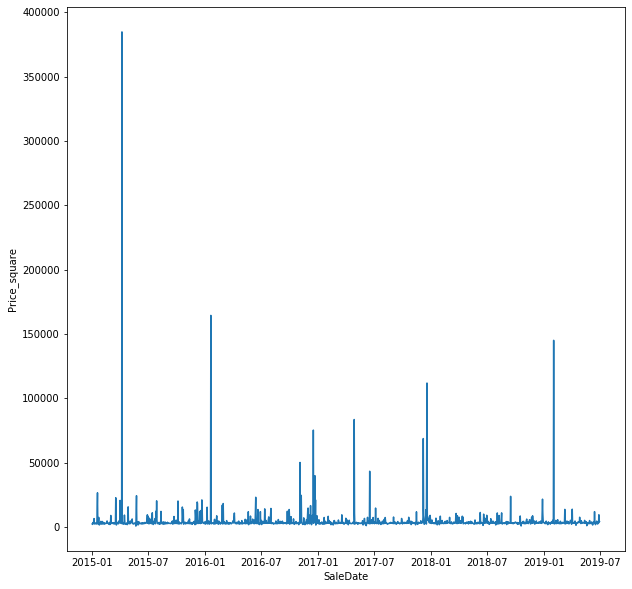

In [77]:
plt.figure(figsize=(10,10))
sns.lineplot(x='SaleDate',y='Price_square' ,data=evolution_price.toPandas())

In [68]:
df_evolution_price=evolution_price.toPandas()
df_evolution_price.set_index("SaleDate",inplace=True)

SaleDate
2015-12-31    AxesSubplot(0.125,0.2;0.775x0.68)
2016-12-31    AxesSubplot(0.125,0.2;0.775x0.68)
2017-12-31    AxesSubplot(0.125,0.2;0.775x0.68)
2018-12-31    AxesSubplot(0.125,0.2;0.775x0.68)
2019-12-31    AxesSubplot(0.125,0.2;0.775x0.68)
Freq: A-DEC, Name: Price_square, dtype: object

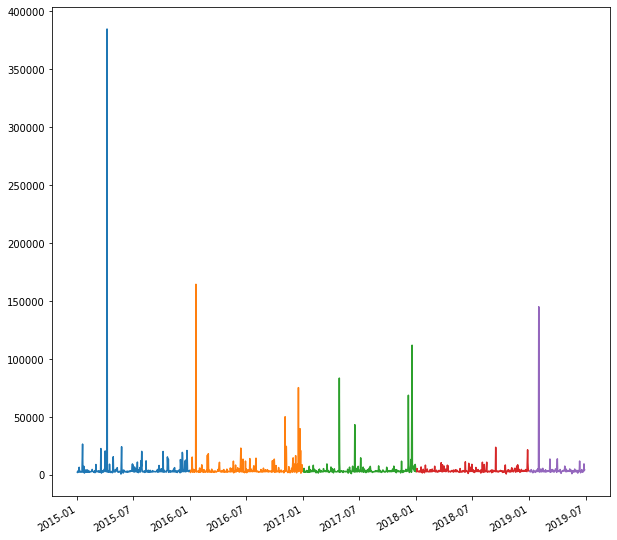

In [90]:
# Evolution per year
plt.figure(figsize=(10,10))
data=df_evolution_price.Price_square.resample('Y')
data.plot()
#sns.lineplot(x='SaleDate',y='Price_square' ,data=df_evolution_price.Price_square.resample('Y').sum())

## The evolution of the price per square meter per City

In [96]:
import pyspark.sql.functions as f

evolution_price_per_city = sales_df.groupBy('City')\
                                         .agg(f.sum('Price')/f.sum('LivingArea'))\
                                         .withColumnRenamed('(sum(Price) / sum(LivingArea))', 'Price_square')\
                                         .orderBy('Price_square', ascending=False)

evolution_price_per_city .show(10)

+--------------------+------------------+
|                City|      Price_square|
+--------------------+------------------+
|          SAINT-JEAN|11336.965146324219|
|            TOULOUSE|10945.983596013864|
|             CUGNAUX|  8652.17382927199|
|             BLAGNAC| 8442.863598576458|
|              PIBRAC| 8094.998380667663|
|          AUCAMVILLE| 6977.596809973555|
|RAMONVILLE-SAINT-...| 6774.700286630607|
|       TOURNEFEUILLE| 5423.551254574287|
|               BALMA| 5027.141324572062|
|          FENOUILLET| 4725.986359206514|
+--------------------+------------------+
only showing top 10 rows



In [20]:
df_evolution= evolution_price_per_city.toPandas()

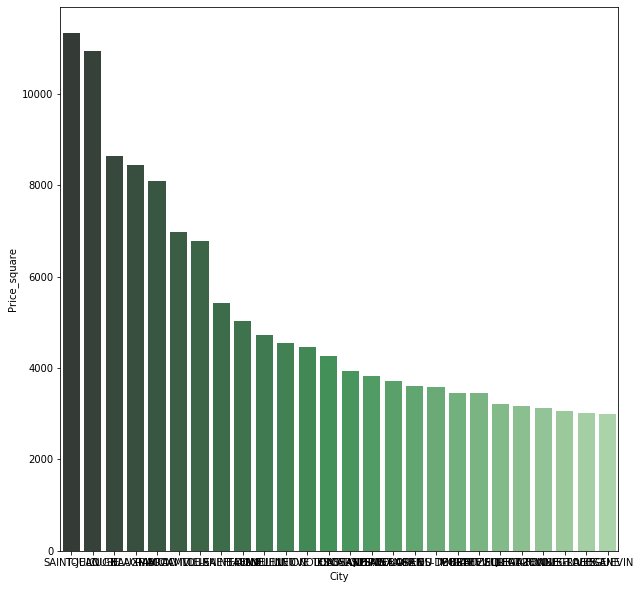

In [36]:
plt.figure(figsize=(10,10))
sns.barplot(x='City',y='Price_square' ,data=df_evolution,palette='Greens_d')

To have a simpler view, we will display just the 10 cities where houses and apartments are expensive.

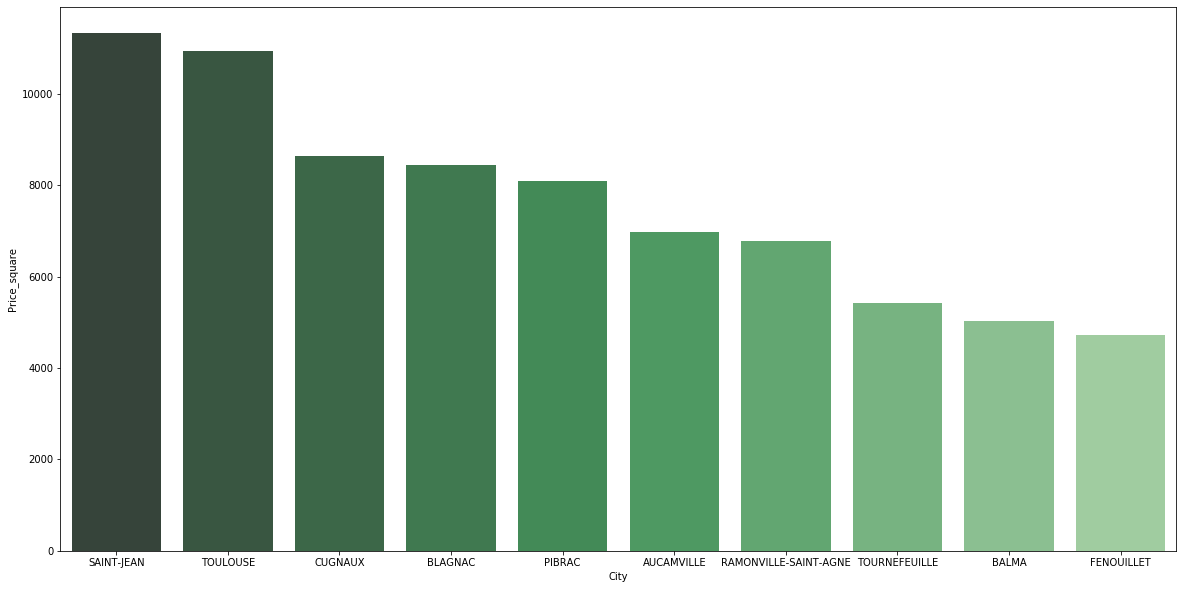

In [38]:
plt.figure(figsize=(20,10))
sns.barplot(x='City',y='Price_square' ,data=df_evolution.head(10),palette='Greens_d')

From this graph we can notice the variation of the price of square meter in each part of Toulouse, For Saint Jean and Toulouse where we find the highest price per square meter which is equal to 11400 in Sain Jean and approximately equal to 11,000 in Toulouse while in Some places like Balma the price is around 4000

## Differences between apartment and houses

### According to the price per square

##  <font color='red'>For the Apartement<font/>

In [40]:
import pyspark.sql.functions as f

apartement = sales_df.filter("ResidenceType=='APARTMENT'")\
                                         .groupBy('City')\
                                         .agg(f.sum('Price')/f.sum('LivingArea'))\
                                         .withColumnRenamed('(sum(Price) / sum(LivingArea))', 'Price_square')\
                                         .orderBy('Price_square', ascending=False)

apartement.show(10)

+--------------------+------------------+
|                City|      Price_square|
+--------------------+------------------+
|             CUGNAUX|14855.048011524332|
|            TOULOUSE| 12499.38457241987|
|             BLAGNAC|11063.772282471182|
|    VIEILLE TOULOUSE|           11000.0|
|          AUCAMVILLE|10666.631636291262|
|       TOURNEFEUILLE|   8923.4300772385|
| VILLENEUVE TOLOSANE| 8602.436019322487|
|RAMONVILLE-SAINT-...|  8406.71687244289|
|             L UNION| 7907.361756859473|
|          FENOUILLET| 7681.813880484121|
+--------------------+------------------+
only showing top 10 rows



In [41]:
df_appartement= apartement.toPandas()

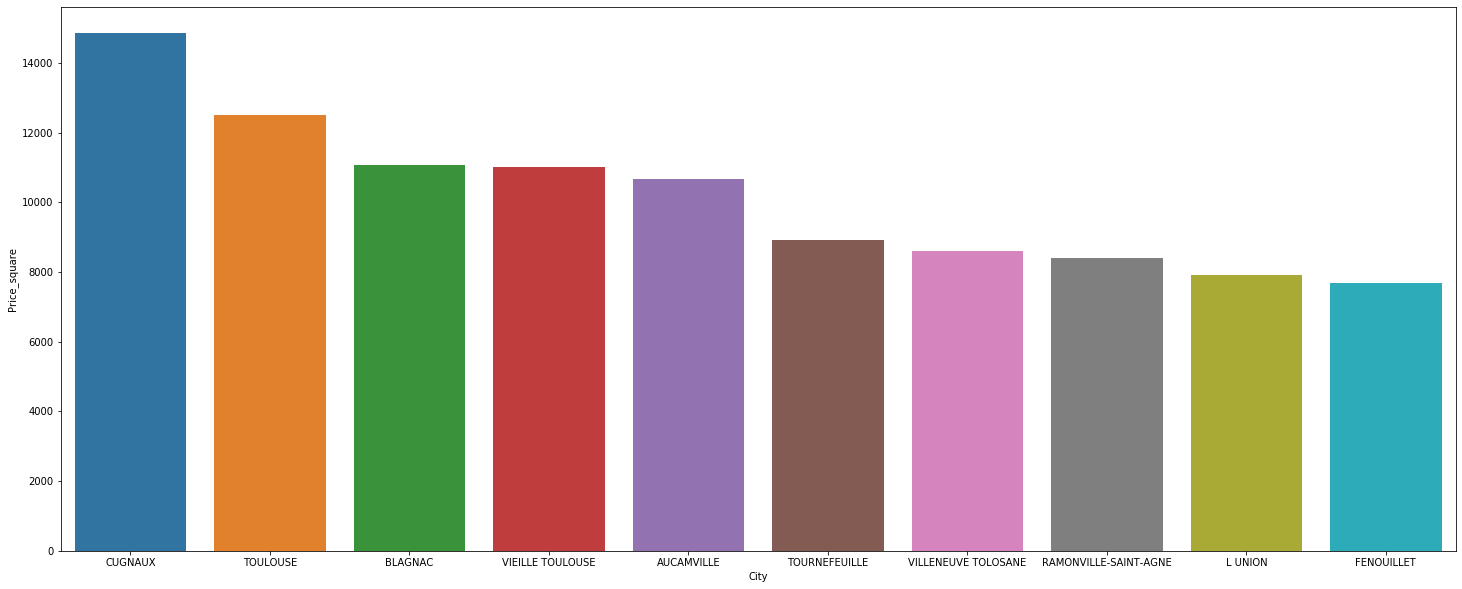

In [48]:
#for the top 10 city
plt.figure(figsize=(25,10))
sns.barplot(x='City',y='Price_square' ,data=df_appartement.head(10))

After choosing to focus in the apartments, we find out that the price of meter square in Cugnaux is the highest which is equal to 15000, the second one is Toulouse where the price is equal 12500 while for Ramonville, L'union, Tournefeuille, the price is around 8000

 ## <font color='red'>For the Houses<font/>

In [50]:
import pyspark.sql.functions as f

House = sales_df.filter("ResidenceType=='HOUSE'")\
                                         .groupBy('City')\
                                         .agg(f.sum('Price')/f.sum('LivingArea'))\
                                         .withColumnRenamed('(sum(Price) / sum(LivingArea))', 'Price_square')\
                                         .orderBy('Price_square', ascending=False)

House.show(10)

+--------------------+------------------+
|                City|      Price_square|
+--------------------+------------------+
|          SAINT-JEAN|14871.181122078677|
|              PIBRAC| 9046.763422564167|
|            TOULOUSE| 4954.676941952277|
|               BALMA| 3815.837518096311|
|  PLAISANCE DU TOUCH|3812.0300820753514|
|SAINT-ORENS-DE-GA...| 3715.380009283135|
|           BEAUZELLE| 3516.966130563798|
|             CUGNAUX|3421.6604730083013|
|    CASTANET TOLOSAN|3331.0814854801783|
|             BLAGNAC|3249.3765753236494|
+--------------------+------------------+
only showing top 10 rows



In [51]:
df_house= House.toPandas()

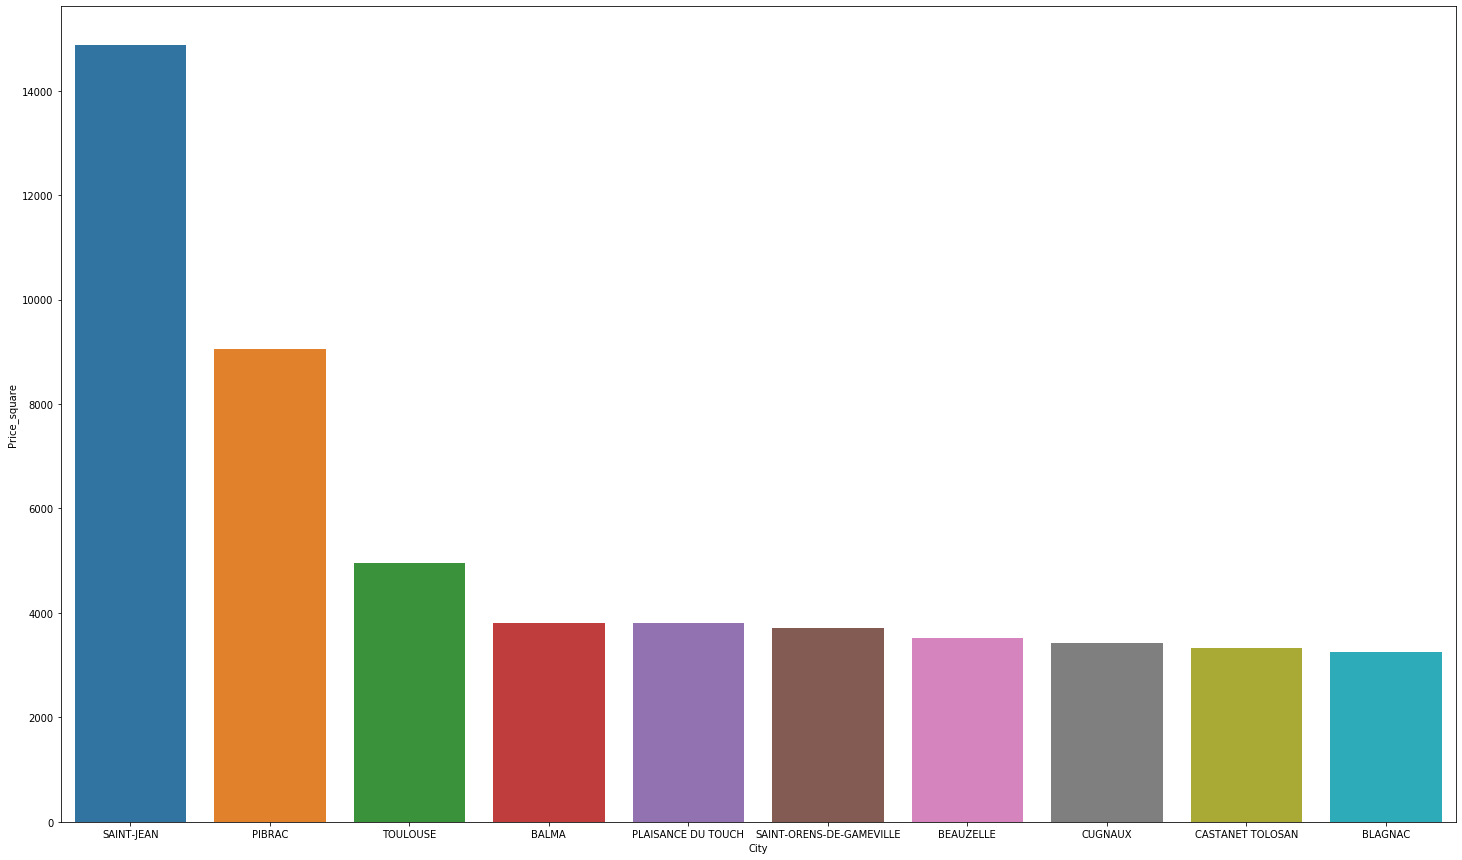

In [56]:
plt.figure(figsize=(25,15))
sns.barplot(x='City',y='Price_square' ,data=df_house.head(10))

For the houses case, it's different from the apartment because the cities with highest price of square meter aren't the same, here we find that Saint-Jean remain the first with the highest price equal to 15000, Pibrac is the second with price equal to 9000, Toulouse is the third while it was the third with price equal to 5000, Cugnaux which has the highest price in apartment case, here for the houses we can find that's belong to lower price interval equal to 3500

## According to the number 

In [99]:
number_of_residence= sales_df.filter("City=='TOULOUSE'").groupBy('ResidenceType').count()
number_of_residence.show()

+-------------+-----+
|ResidenceType|count|
+-------------+-----+
|        HOUSE| 6191|
|    APARTMENT|45606|
+-------------+-----+



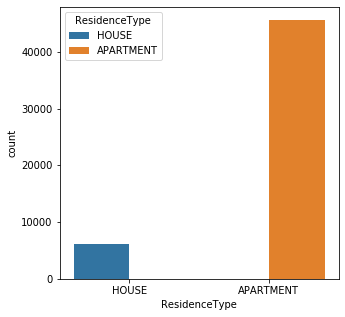

In [100]:
plt.figure(figsize=(5,5))
sns.barplot(x='ResidenceType',y='count',hue='ResidenceType' , data=number_of_residence.toPandas())

In [105]:
number_of_residence_real_estate= sales_df.filter("City!='TOULOUSE'").groupBy('ResidenceType').count()
number_of_residence_real_estate.show()

+-------------+-----+
|ResidenceType|count|
+-------------+-----+
|        HOUSE|11439|
|    APARTMENT|16882|
+-------------+-----+



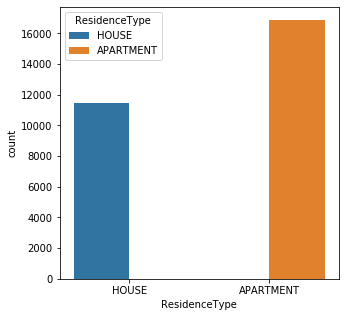

In [103]:
plt.figure(figsize=(5,5))
sns.barplot(x='ResidenceType',y='count',hue='ResidenceType' , data=number_of_residence_real_estate.toPandas())

In Toulouse, we can see that it has a lot of apartment compared to number of houses which is equalt to 1/5 number of apartments while for the other cities, number of apartments still higher alos than number of houses that increase to be equal to 110000

## According to the number of Rooms

In [138]:
number_of_room_toulouse= sales_df.filter("City=='TOULOUSE'").groupBy('ResidenceType').mean()
number_of_room_toulouse.show()

+-------------+-----------------+------------------+-----------------+-------------------+------------------+------------------+
|ResidenceType|       avg(Price)|     avg(PostCode)|     avg(NbRooms)|        avg(NbLots)|   avg(LivingArea)|     avg(LandArea)|
+-------------+-----------------+------------------+-----------------+-------------------+------------------+------------------+
|        HOUSE|517728.9272460021|31274.430625100955|4.347762881602326|0.17057018252301728|104.49297367145857|493.43110967533516|
|    APARTMENT|683836.8735260702|31246.662719817567|2.547537604701136| 1.2188966364074902| 54.70964346796474| 155.0749682059378|
+-------------+-----------------+------------------+-----------------+-------------------+------------------+------------------+



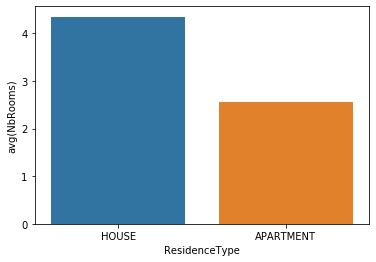

In [141]:
sns.barplot(x='ResidenceType',y='avg(NbRooms)',data=number_of_room_toulouse.toPandas())

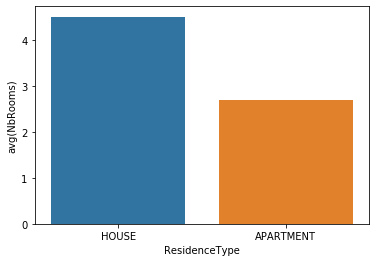

In [134]:
number_of_room_real_estate= sales_df.filter("City!='TOULOUSE'").groupBy('ResidenceType').mean()
sns.barplot(x='ResidenceType',y='avg(NbRooms)',data=number_of_room_real_estate.toPandas())

# Identification of sales outliers

In [85]:
df_house= profit_ratio_region_ordered_df_house.toPandas()

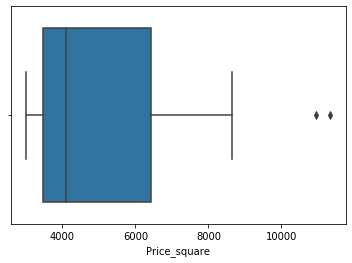

In [119]:
sns.boxplot(x='Price_square', data=df_evolution)

This graph shows that the distribution is skewed to the left with a mean price equal to 4200 and the minimum price is below 4000, while the maximum price is 8500 with the existence of some outliers price which are equal to approximately 12000 and 1400 

# Differences between types of Saletype 

### For House

In [106]:


Differences_between_types_of_sales = sales_df.filter("ResidenceType=='HOUSE'").groupBy('SaleType').sum()
                                           
Differences_between_types_of_sales.show(10)

+--------------------+--------------------+-------------+------------+-----------+---------------+-------------+
|            SaleType|          sum(Price)|sum(PostCode)|sum(NbRooms)|sum(NbLots)|sum(LivingArea)|sum(LandArea)|
+--------------------+--------------------+-------------+------------+-----------+---------------+-------------+
|SALE BEFORE COMPL...|2.4256131114000002E8|     22649030|        2796|        800|          59342|        32386|
|                SALE| 7.721473031579999E9|    530942170|       75789|       2248|        1826784|      9908893|
+--------------------+--------------------+-------------+------------+-----------+---------------+-------------+



In [107]:
df_Differences_between_types_of_sales= Differences_between_types_of_sales.toPandas()

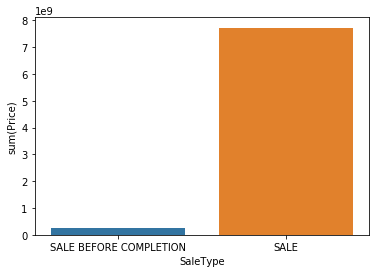

In [108]:
sns.barplot(x='SaleType',y='sum(Price)',data=df_Differences_between_types_of_sales)

In [109]:


Differences_between_types_of_sales_app= sales_df.filter("ResidenceType=='APARTMENT'").groupBy('SaleType').sum()
                                           
Differences_between_types_of_sales_app.show(10)

+--------------------+--------------------+-------------+------------+-----------+---------------+-------------+
|            SaleType|          sum(Price)|sum(PostCode)|sum(NbRooms)|sum(NbLots)|sum(LivingArea)|sum(LandArea)|
+--------------------+--------------------+-------------+------------+-----------+---------------+-------------+
|SALE BEFORE COMPL...|3.7403509064600005E9|    398410390|       32031|      17954|         679313|          224|
|                SALE|3.532664131181998E10|   1558109550|      129746|      62084|        2793875|     10410602|
+--------------------+--------------------+-------------+------------+-----------+---------------+-------------+



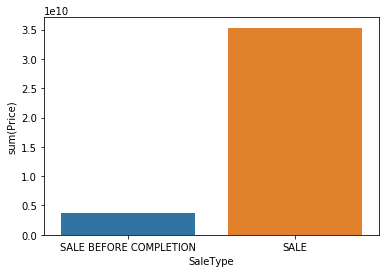

In [111]:
sns.barplot(x='SaleType',y='sum(Price)',data=Differences_between_types_of_sales_app.toPandas())

What we can observe from this 2 graphs is that most of sales are done after completion. 